<a href="https://www.kaggle.com/shikharg11/loan-default-prediction?scriptVersionId=87544787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loan Default Prediciton
*The main objective is to predict if a loan is going to be paid or not.*

With our target variable ***defaulted***:
* defaulted = 1 (failed to pay the loan)
* non defaulted = 0 (paid the loan)

We are predicting that who's not going to pay their loan!

The dataset has 5 features and 10000 rows.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-prediction/Default_Fin.csv


In [2]:
# importing more important libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set(rc={'figure.figsize':[8,8]}, font_scale=1.2)


# Loading Dataset

In [3]:
df = pd.read_csv('../input/loan-default-prediction/Default_Fin.csv')
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.rename(columns={'Employed':'employed','Bank Balance':'bank_balance','Annual Salary':'annual_salary','Defaulted?':'defaulted'},inplace=True)
df.columns

Index(['Index', 'employed', 'bank_balance', 'annual_salary', 'defaulted'], dtype='object')

In [5]:
df.describe()

,Index,employed,bank_balance,annual_salary,defaulted
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [6]:
df.isnull().sum()

Index            0
employed         0
bank_balance     0
annual_salary    0
defaulted        0
dtype: int64

* There are no null values.
* Features 'employed' and 'defaulted' are categorical features.
* 'defaulted' will be our targeted variable.
* 'Index' will be dropped.

In [7]:
df.drop('Index',axis=1,inplace=True)
df.head()

,employed,bank_balance,annual_salary,defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


# Feature Visualization

<AxesSubplot:xlabel='defaulted', ylabel='count'>

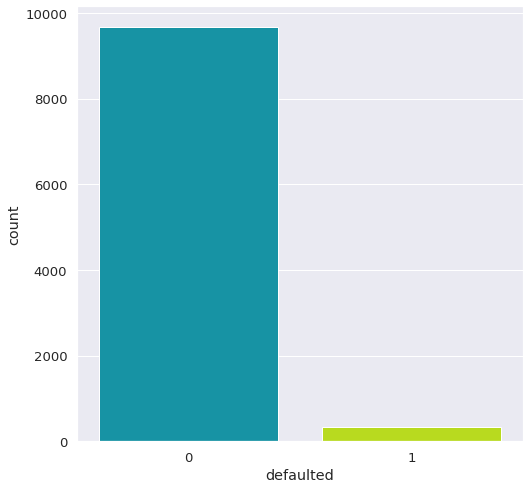

In [8]:
sns.countplot(x='defaulted',data=df,palette='nipy_spectral')

In [9]:
df.defaulted.value_counts()

0    9667
1     333
Name: defaulted, dtype: int64

Dataset has approx 33.3% data who won't be able to pay their loans

In [10]:
df.skew()

employed        -0.902340
bank_balance     0.246065
annual_salary    0.073341
defaulted        5.203134
dtype: float64

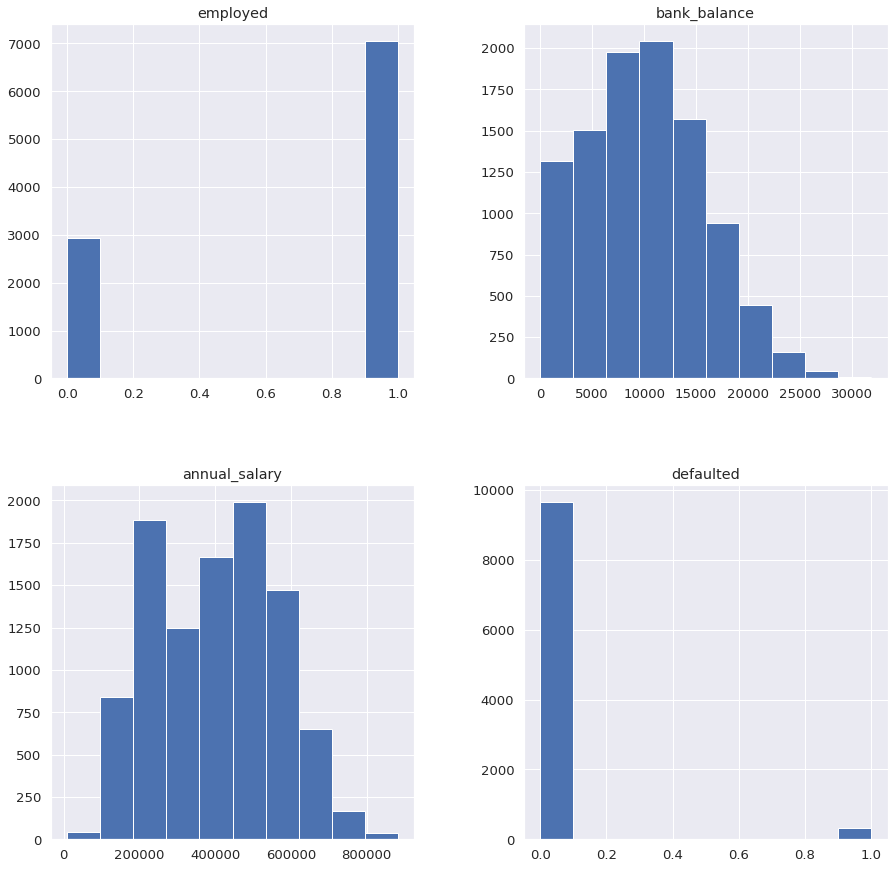

In [11]:
df.hist(figsize=(15,15))
plt.show()

We can see that 'employed' feature is negative skewed amd rest are positive skewed. Plus the values are not in the same level.

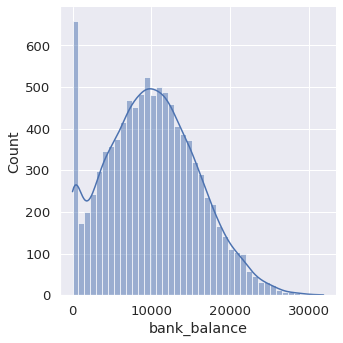

In [12]:
sns.displot(df['bank_balance'],kde=True)

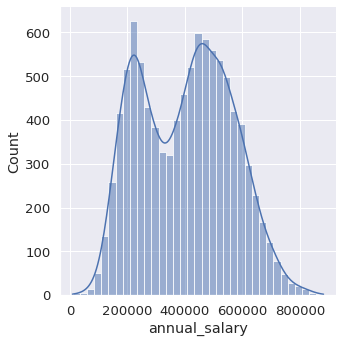

In [13]:
sns.displot(df['annual_salary'],kde=True)

# Correlation Matrix

In [14]:
x=df.drop('defaulted',axis=1)
y=df.defaulted

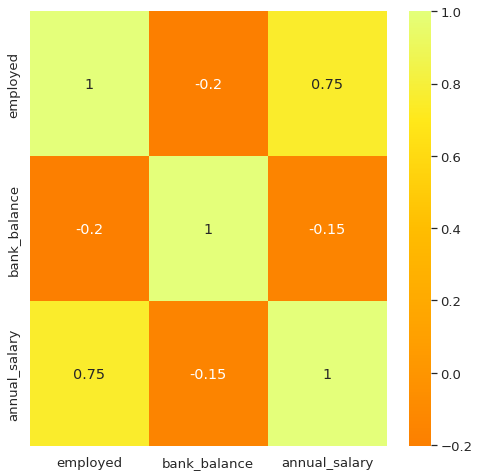

In [15]:
corre = x.corr()
sns.heatmap(corre,annot=True,cmap="Wistia_r")
plt.show()

* **'bank_balance'** and **'annual_salary'** are not *correated*.
* **'bank_balance'** and **'employed'** are not *correated*.

This is happening because of the differnce in data each feature has.

So now we will scale the value.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
x1 = scaler.fit_transform(x)
x1

array([[1.        , 0.27484629, 0.59890501],
       [0.        , 0.30786793, 0.15572696],
       [1.        , 0.40445387, 0.4258616 ],
       ...,
       [1.        , 0.31850342, 0.79503151],
       [1.        , 0.59111562, 0.49321277],
       [0.        , 0.07569547, 0.22108382]])

# Splitting the dataset

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state=1)

In [18]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (8000, 3)
X_test: (2000, 3)
Y_train: (8000,)
Y_test: (2000,)


# Building Models

In [19]:
# Finding value of k for K-Neighbors Classifier
k = (len(x_train)**(0.5))//2
k

44.0

Function for Model Evaluation

In [20]:
from sklearn.metrics import classification_report

In [21]:
predicted=[]
def model_evaluate(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model)
    print(classification_report(y_test,y_pred))
    predicted.append(accuracy_score(y_test,y_pred))

In [22]:
key = ["Logistic Regression",'K-Neighbors Classifier','RandomForestClassifier','GradientBoostingClassifier']
value=[LogisticRegression(),KNeighborsClassifier(n_neighbors = 44, weights ='uniform'), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20)]
models = dict(zip(key,value))
models

{'Logistic Regression': LogisticRegression(),
 'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=44),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20)}

In [23]:
model_evaluate(models[key[0]])


LogisticRegression()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1941
           1       0.72      0.22      0.34        59

    accuracy                           0.97      2000
   macro avg       0.85      0.61      0.66      2000
weighted avg       0.97      0.97      0.97      2000



In [24]:
model_evaluate(models[key[1]])

KNeighborsClassifier(n_neighbors=44)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1941
           1       0.67      0.27      0.39        59

    accuracy                           0.97      2000
   macro avg       0.82      0.63      0.69      2000
weighted avg       0.97      0.97      0.97      2000



In [25]:
model_evaluate(models[key[2]])

RandomForestClassifier(n_estimators=60, random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1941
           1       0.37      0.32      0.35        59

    accuracy                           0.96      2000
   macro avg       0.68      0.65      0.66      2000
weighted avg       0.96      0.96      0.96      2000



In [26]:
model_evaluate(models[key[3]])

GradientBoostingClassifier(random_state=20)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1941
           1       0.38      0.29      0.33        59

    accuracy                           0.96      2000
   macro avg       0.68      0.64      0.65      2000
weighted avg       0.96      0.96      0.96      2000



In [27]:
mod = pd.DataFrame({'Models':key,'Accuracies' : predicted})
mod

,Models,Accuracies
0,Logistic Regression,0.9745
1,K-Neighbors Classifier,0.9745
2,RandomForestClassifier,0.9640
3,GradientBoostingClassifier,0.9650


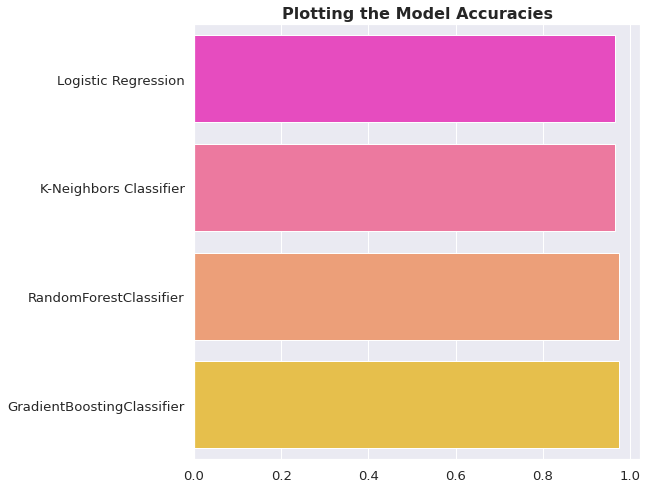

In [28]:
ax = sns.barplot(x = predicted, y = key, palette='spring', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")
plt.show()

***Logistic Regression*** and ***K-Neighbors Classifiers*** have highest and same accuracy as compared to others.